# 선형 회귀분석 실습 ##########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. 선형 회귀분석 실습

### 1단계: 데이터 준비

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./datas/auto-mpg.csv", header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [4]:
#컬럼 이름 추가
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
pd.set_option('display.max_columns',10)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 2단계: 데이터 탐색

In [6]:
print(df.info())
print(df.describe())
print(df['horsepower'].unique()) #물음표값이 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000   

In [7]:
# 물음표 값을  NaN 값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True)
print(df['horsepower'].unique())

#NaN 인 행 삭제
df.dropna(subset=['horsepower'], axis=0 , inplace=True)
print(df['horsepower'].unique())

#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')
print(df.describe())


['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' nan '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '100.0' '105.0' '175.0' '153.0' '180.0'
 '110.0' '72.00' '86.

### 3단계 : 분석에 사용할 특성(열,변수) 선택(연비,실린더,마력,중력)

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


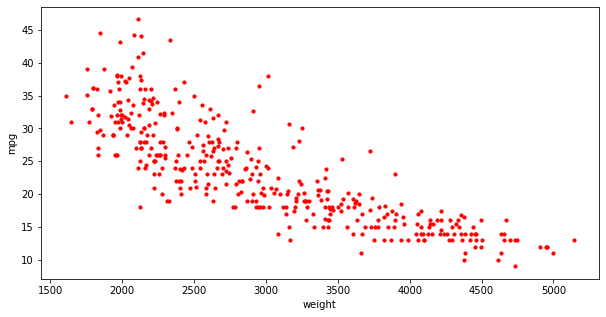

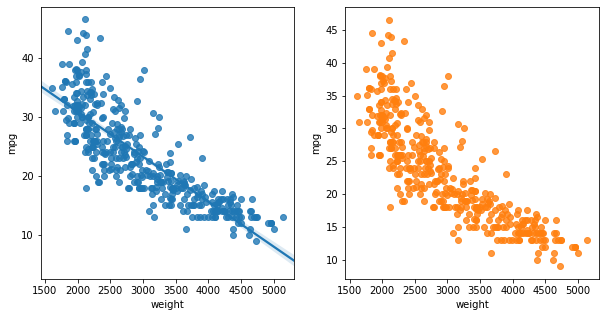

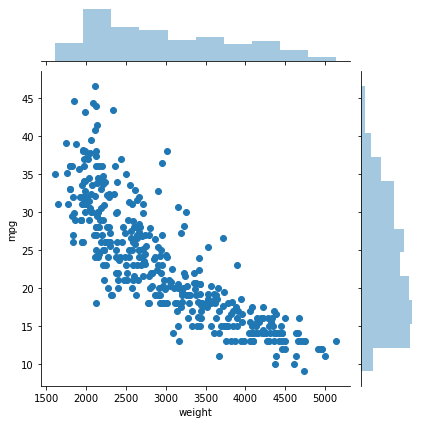

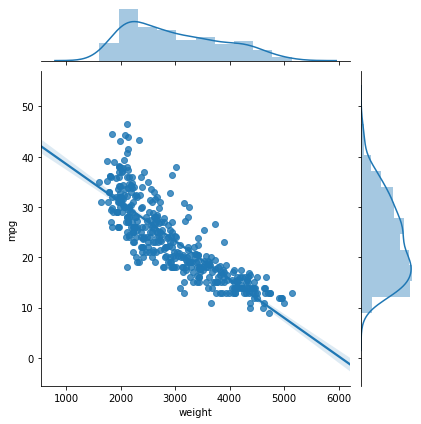

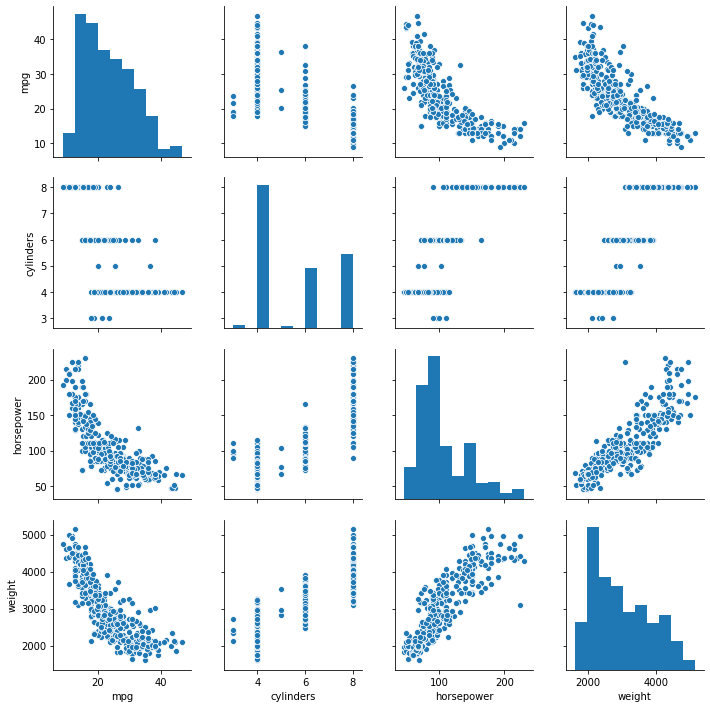

In [10]:
ndf = df[['mpg','cylinders','horsepower','weight']]
print(ndf.head())

# 종속변수(mpg)와 다른 변수간의 선형관계여부 확인, plot으로 그려보기

#matplotlib로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='red', s=10, figsize=(10,5))
plt.show()
plt.close()

#seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data = ndf, ax = ax1)
sns.regplot(x='weight', y='mpg', data = ndf, ax = ax2, fit_reg=False) #fit_reg True는 회귀선이 나온다.

plt.show()
plt.close()


sns.jointplot(x='weight',y='mpg', data=ndf)
sns.jointplot(x='weight',y='mpg', data=ndf, kind='reg') # 회귀선 표시
plt.show()
plt.close()

sns.pairplot(ndf)
plt.show()
plt.close()

### 4단계 : 훈련 데이터와 테스트 데이터로 분리

In [11]:
# train data 와 test data를 7:3 비율로 분리
X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤하게 추출 -> 값 10

print('train data  개수 :', len(X_train))
print('test data  개수 :', len(X_test))



train data  개수 : 274
test data  개수 : 118


In [15]:
X

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0
...,...
393,2790.0
394,2130.0
395,2295.0
396,2625.0


### 5단계 : 단순회귀분석 - 학습

In [12]:
#선형회귀 라이브러리의 선형회귀분석 모듈 
from sklearn.linear_model import LinearRegression

#단순 선형회귀분석 객체 생성
lr = LinearRegression()

#학습
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#학습 후 결정계수 계산
r_square = lr.score(X_test, Y_test)
print(r_square) #0.6822458558299325

0.6822458558299325


In [17]:
#기울기
print("기울기 a: {0}" .format(lr.coef_)) # -0.00775343

#절편
print('절편 b : {0}' .format( lr.intercept_)) #46.710366257280086

기울기 a: [-0.00775343]
절편 b : 46.710366257280086


In [18]:
#예측값 구하기
y_predict = lr.predict(X) # 독립변수(X)에 대한 예측된 종속변수값
print(y_predict)


[19.54234168 18.0769431  20.06957503 20.09283533 19.96878042 13.05271937
 12.95192476 13.27756889 12.40143111 16.85965432 19.08488921 18.72823136
 17.54970974 22.78327612 28.31922633 24.74489433 25.2023468  26.65223852
 30.1955568  32.48281914 25.99319683 27.8695273  28.29596604 29.3891999
 26.17927919 10.92827909 12.78134926 12.73482867 10.02112759 30.1955568
 29.15659695 29.43572049 26.28782724 20.04631474 20.89919222 21.10853488
 21.21708292 14.07617235 12.09904728 14.50261109 14.95231013  8.29211233
  9.91257955  6.85772747 23.74470165 28.04010279 21.26360351 22.37234424
 29.49774795 30.24983082 30.62974897 30.69952986 32.9635319  34.20408097
 32.49057257 31.55240734 29.04804891 30.22657052 29.23413127 28.04010279
 29.45122736 13.57219929 12.71156838 14.6499263  14.69644689 18.23976516
 10.78871732 11.80441687 12.16107473 12.42469141 28.64487046 16.53401019
 14.93680327 13.41713066 15.09962533 23.96955117 27.24149933 23.61289331
 29.73810433 28.1408974  28.97051459 27.28026649 29.9

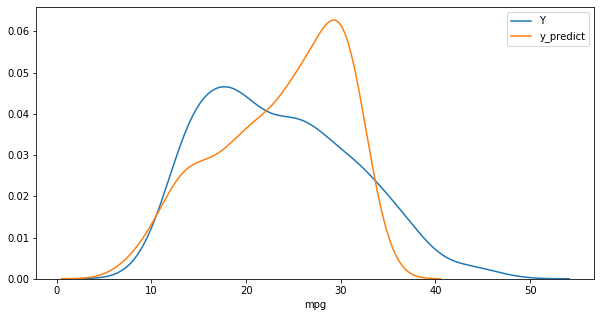

In [19]:
#실제 테스트 결과 값(Y)과 예측 결과값(y_predict)
#결과값이 떨어지는 것으로 보아 연비에 영향을 미치는 다른 변수가 있다.
plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(y_predict, hist = False , label = 'y_predict', ax=ax1)
plt.show()
plt.close()

## 2. 다항 회귀분석 실습

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#1단계: 데이터 준비
df = pd.read_csv("./datas/auto-mpg.csv", header=None)
print(df.info()) 

#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [21]:
#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]

In [31]:
# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비

# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_tset, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

In [23]:
# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 
from  sklearn.preprocessing import PolynomialFeatures  #다항식 변환

In [32]:
#다항식 변환
poly = PolynomialFeatures(degree=2)  # 2차항 적용
x_train_poly =poly.fit_transform(X_train)   # X학습데이터를 2차항으로 변형
print(x_train_poly.shape) #(274, 3)
print(X_train.shape) # (274, 1)
print(list(x_train_poly))
lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(x_train_poly, Y_train)  #학습

x_test_poly =poly.fit_transform(X_test) 
r_square = lr.score(x_test_poly, Y_test) # 결정 계수 계산
print(r_square )    #결정 계수 :  0.7087009262975685

print('기울기 a : ', lr.coef_) #기울기 a :  [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
print('절편 b : ', lr.intercept_) # 절편 b :   62.58071221573144

(274, 3)
(274, 1)
[array([1.0000000e+00, 4.2090000e+03, 1.7715681e+07]), array([1.000000e+00, 2.223000e+03, 4.941729e+06]), array([1.00000e+00, 3.41000e+03, 1.16281e+07]), array([1.000000e+00, 2.164000e+03, 4.682896e+06]), array([1.000000e+00, 2.615000e+03, 6.838225e+06]), array([1.000000e+00, 2.385000e+03, 5.688225e+06]), array([1.000000e+00, 2.795000e+03, 7.812025e+06]), array([1.0000000e+00, 3.2450000e+03, 1.0530025e+07]), array([1.000000e+00, 3.102000e+03, 9.622404e+06]), array([1.000000e+00, 2.506000e+03, 6.280036e+06]), array([1.00000e+00, 3.57000e+03, 1.27449e+07]), array([1.0000e+00, 1.9400e+03, 3.7636e+06]), array([1.0000e+00, 2.9900e+03, 8.9401e+06]), array([1.000000e+00, 2.085000e+03, 4.347225e+06]), array([1.000000e+00, 2.855000e+03, 8.151025e+06]), array([1.0000000e+00, 3.2880000e+03, 1.0810944e+07]), array([1.000000e+00, 2.125000e+03, 4.515625e+06]), array([1.000000e+00, 2.246000e+03, 5.044516e+06]), array([1.000000e+00, 2.395000e+03, 5.736025e+06]), array([1.0000e+00, 2.

In [26]:
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [25]:
x_train_poly

array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06],
       [1.0000000e+00, 3.5700000e+03, 1.2744900e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.9900000e+03, 8.9401000e+06],
       [1.0000000e+00, 2.0850000e+03, 4.3472250e+06],
       [1.0000000e+00, 2.8550000e+03, 8.1510250e+06],
       [1.0000000e+00, 3.2880000e+03, 1.0810944e+07],
       [1.0000000e+00, 2.1250000e+03, 4.5156250e+06],
       [1.0000000e+00, 2.2460000e+03, 5.0445160e+06],
       [1.0000000e+00, 2.395

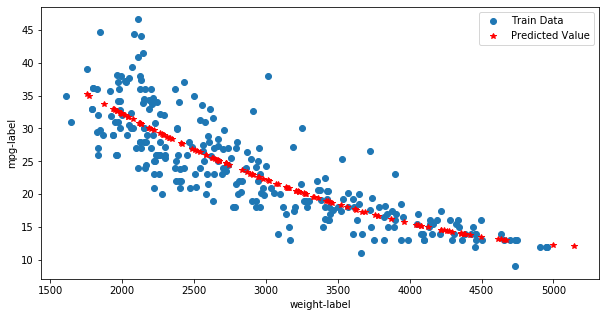

In [91]:
y_test_predict = lr.predict(x_test_poly)  #test 데이터에 대한 모델의 예측값 구하기
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1, 1)

ax.plot(X_train, Y_train, 'o', label='Train Data')
ax.plot(X_test, y_test_predict, 'r*', label='Predicted Value')  #학습한 회귀선

ax.legend(loc='best')

plt.xlabel('weight-label')
plt.ylabel('mpg-label')

plt.show()
plt.close()

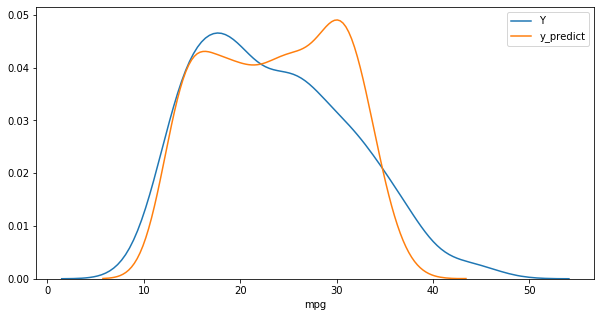

In [90]:
#전체 데이터를 2차항으로 변형
X_poly = poly.fit_transform(X)
y_predict = lr.predict(X_poly) # 전체 데이터 X에 대한 모델의 예측값 반환
fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(Y, hist=False, label='Y')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()

## 3. 다중 회귀분석 실습

In [108]:
######################다중  회귀분석 실습 ##########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_csv("./datas/auto-mpg.csv", header=None)
print(df.info()) 

#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# horsepower열에서 ?를 NaN값으로 대체
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)
#문자열 데이터를 실수형 데이터로 변환
df['horsepower'] = df['horsepower'].astype('float')

#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight']]


# 4단계 : 훈련 데이터와 테스트 데이터로 분리
X= ndf[['cylinders', 'horsepower', 'weight']]   #독립변수 X : 무게
Y=ndf['mpg']    #종속변수 Y : 연비


# train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
0    398 non-null float64
1    398 non-null int64
2    398 non-null float64
3    398 non-null object
4    398 non-null float64
5    398 non-null float64
6    398 non-null int64
7    398 non-null int64
8    398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [98]:
#5단계 : 다중 회귀분석  
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 
lr = LinearRegression()

In [109]:
lr.fit(X_train, Y_train)  #학습 => 모델 생성

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print('결정 계수 : ',r_square)    #결정 계수 :  
print('기울기 a : ', lr.coef_) #기울기 a :  [ 0.00000000e+00 -1.85768289e-02  1.70491223e-06]
print('절편 b : ', lr.intercept_) # 절편 b :   62.58071221573144

결정 계수 :  0.6939048496695597
기울기 a :  [-0.60691288 -0.03714088 -0.00522268]
절편 b :  46.41435126963405


<function matplotlib.pyplot.show(*args, **kw)>

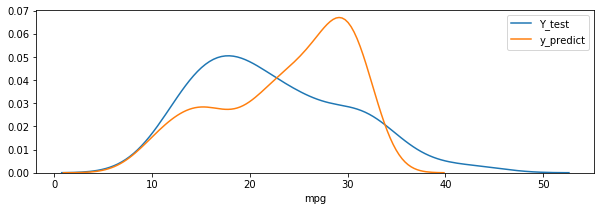

In [122]:
y_predict = lr.predict(X)
fig = plt.figure(figsize=(10,3))
ax1 = sns.distplot(Y_test, hist=False,label='Y_test')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show

In [119]:
cm = np.corrcoef(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']].values.T)
print(cm)

[[ 1.         -0.77761751 -0.80512695 -0.77842678 -0.83224421  0.42332854
   0.58054097  0.56520876]
 [-0.77761751  1.          0.9508233   0.84298336  0.89752734 -0.50468338
  -0.34564744 -0.56893159]
 [-0.80512695  0.9508233   1.          0.897257    0.9329944  -0.5438005
  -0.36985521 -0.61453511]
 [-0.77842678  0.84298336  0.897257    1.          0.86453774 -0.68919551
  -0.41636148 -0.45517145]
 [-0.83224421  0.89752734  0.9329944   0.86453774  1.         -0.4168392
  -0.30911988 -0.58500535]
 [ 0.42332854 -0.50468338 -0.5438005  -0.68919551 -0.4168392   1.
   0.29031611  0.21274581]
 [ 0.58054097 -0.34564744 -0.36985521 -0.41636148 -0.30911988  0.29031611
   1.          0.18152772]
 [ 0.56520876 -0.56893159 -0.61453511 -0.45517145 -0.58500535  0.21274581
   0.18152772  1.        ]]


## 4. 로지스틱 회귀분석 실습

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
score=[56,60,61,67,69, 55,70,44,51,64, 60,50,68,72,90, 93,85,74,81,88, 92,97,77,78,98]
grade=[3.61, 2.93, 3.14, 4.00, 3.23,  3.89, 3.66, 3.51, 2.53, 3.61,  2.93, 3.14, 4.00, 3.23, 2.53, 3.23, 3.89, 3.66, 3.51, 3.89,  3.66, 3.51, 2.53 ,3.14, 4.00]
_pass = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(len(score))
print(len(grade))
print(len(_pass))


25
25
25


In [140]:
df = pd.DataFrame({"score":score, "grade":grade, "_pass":_pass})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
score    25 non-null int64
grade    25 non-null float64
_pass    25 non-null int64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


In [141]:
X = df[['score','grade']]
Y = df['_pass']

# train data와 test data 7:3으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤하게 추출 -> 값 10

#로지스틱 회귀 선언 및 fit
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train, Y_train)
print("정확도: ", logR.score(X_train, Y_train))
print("정확도: ", logR.score(X_test, Y_test))



정확도:  0.7647058823529411
정확도:  0.75


C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [143]:
#confusion Matrix , 정확도, 재현율(recall), F1 지료를 나타냄
from sklearn.metrics import classification_report
y_predict = logR.predict(X_test)
print(classification_report(Y_test,y_predict)) 


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



In [144]:
import statsmodels.api as sm

In [148]:
logit = sm.Logit(df['_pass'],X) #로지스틱 회귀분석 수행
result = logit.fit()
print(result.summary2())
print(result.params)


Optimization terminated successfully.
         Current function value: 0.431881
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.370     
Dependent Variable: _pass            AIC:              25.5940   
Date:               2019-12-20 16:09 BIC:              28.0318   
No. Observations:   25               Log-Likelihood:   -10.797   
Df Model:           1                LL-Null:          -17.148   
Df Residuals:       23               LLR p-value:      0.00036517
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
score      0.1320     0.0536    2.4625   0.0138    0.0269    0.2371
grade     -2.6205     1.0922   -2.3994   0.0164   -4.7611 